In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import norm


# 1. Gathering Data

In [16]:
tickers = ["TSLA"]
yf.pdr_override()
start_date = "2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = round(web.get_data_yahoo(tickers, start=start_date, end=end_date),2)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.47,118.80,104.64,108.10,108.10,231402800
2023-01-04,109.11,114.59,107.52,113.64,113.64,180389000
2023-01-05,110.51,111.75,107.16,110.34,110.34,157986300
2023-01-06,103.00,114.39,101.81,113.06,113.06,220911100
2023-01-09,118.96,123.52,117.11,119.77,119.77,190284000


In [6]:
#data.info()
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,385.00,385.00,385.00,385.00,385.00,3.850000e+02
mean,24.57,24.80,24.32,24.57,23.37,2.133859e+07
std,3.28,3.26,3.28,3.27,3.72,1.261676e+07
min,16.42,16.63,16.21,16.32,14.54,0.000000e+00
25%,22.24,22.37,22.00,22.20,20.36,1.441140e+07
50%,24.75,25.06,24.48,24.75,23.46,1.828040e+07
75%,27.40,27.58,27.15,27.40,26.73,2.433480e+07
max,29.78,29.95,29.53,29.80,28.76,1.279432e+08


In [18]:
data_adj_close = data[["Adj Close"]]
mean_value = data_adj_close.mean().values[0] if isinstance(data_adj_close.mean(), pd.Series) else data_adj_close.mean()
mean_value.round(2)

208.23

# 2. Visualizing the Data

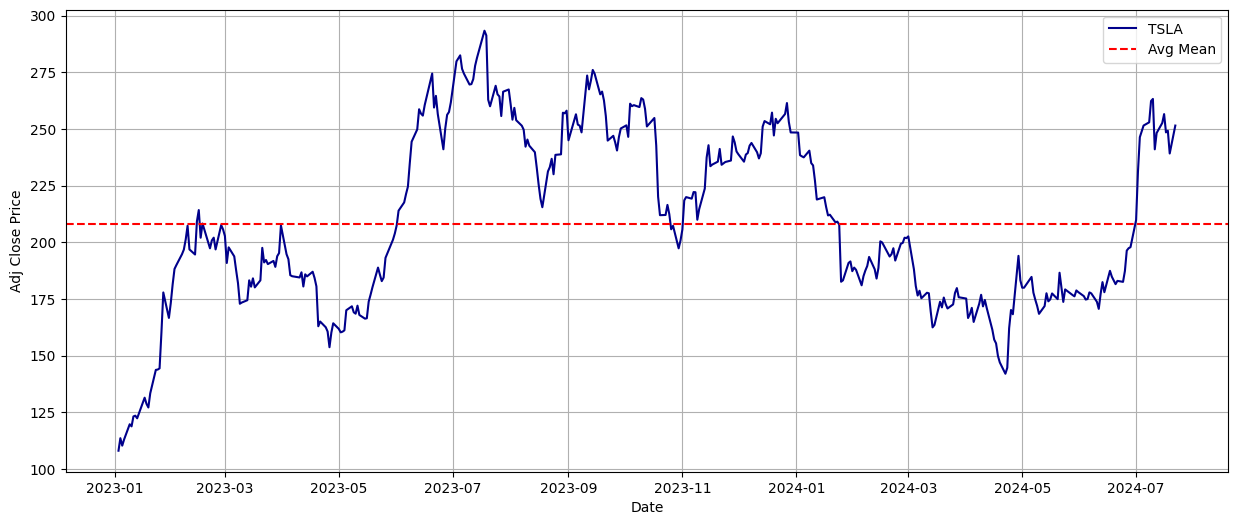

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(data_adj_close, label=tickers[0], color='darkblue')
plt.axhline(y=mean_value.round(2), label="Avg Mean", color='red', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid()
plt.show()

# 3. Creating Method to automatize previous procedure. 

In [95]:
def check_historical_mean(ticker, start_date, end_date, bool_plot_all_graphs, bool_plot_interesting_graph):
    yf.pdr_override()    
    data_adj_close = None
    mean_value = None
    data = round(web.get_data_yahoo(ticker, start=start_date, end=end_date),2)
    data_adj_close = data[["Adj Close"]]
    mean_value = data_adj_close.mean().values[0] if isinstance(data_adj_close.mean(), pd.Series) else data_adj_close.mean()
    mean_value = mean_value.round(2)

    print("Results:")
    print(f"Ticker: {ticker}")
    print(f"Average price: R$ {mean_value}")
    print(f"Actual Price:  R$ {data_adj_close.iloc[-1].values[0]}")
    print("------------------------------------------------------")

    if bool_plot_all_graphs: 
        plot_graph(ticker, data_adj_close)

    if (mean_value > data_adj_close.iloc[-1].values[0]) and (bool_plot_interesting_graph):
        plot_graph(ticker, data_adj_close, mean_value)


def plot_graph(ticker, data_adj_close, mean_value):
    plt.figure(figsize=(15, 6))
    plt.plot(data_adj_close, label=ticker, color='darkblue')
    plt.axhline(y=mean_value.round(2), label="Avg Mean", color='red', linestyle='--')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.grid()
    plt.show()

# 4. Running Function for Other Companies

[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: VAMO3.SA
Average price: R$ 10.21
Actual Price:  R$ 8.77
------------------------------------------------------


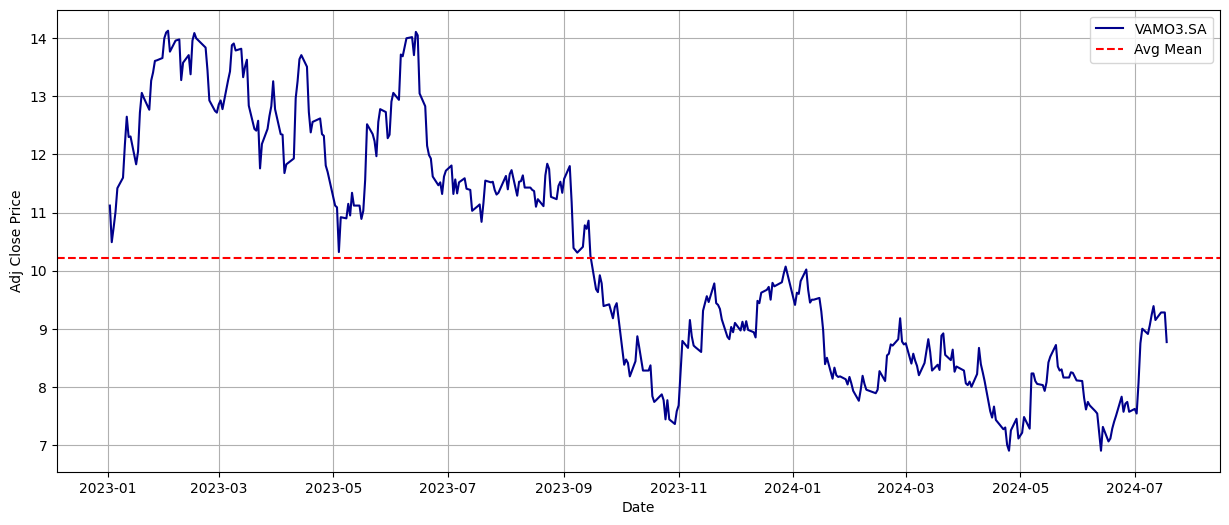

[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: TTEN3.SA
Average price: R$ 11.24
Actual Price:  R$ 10.8
------------------------------------------------------


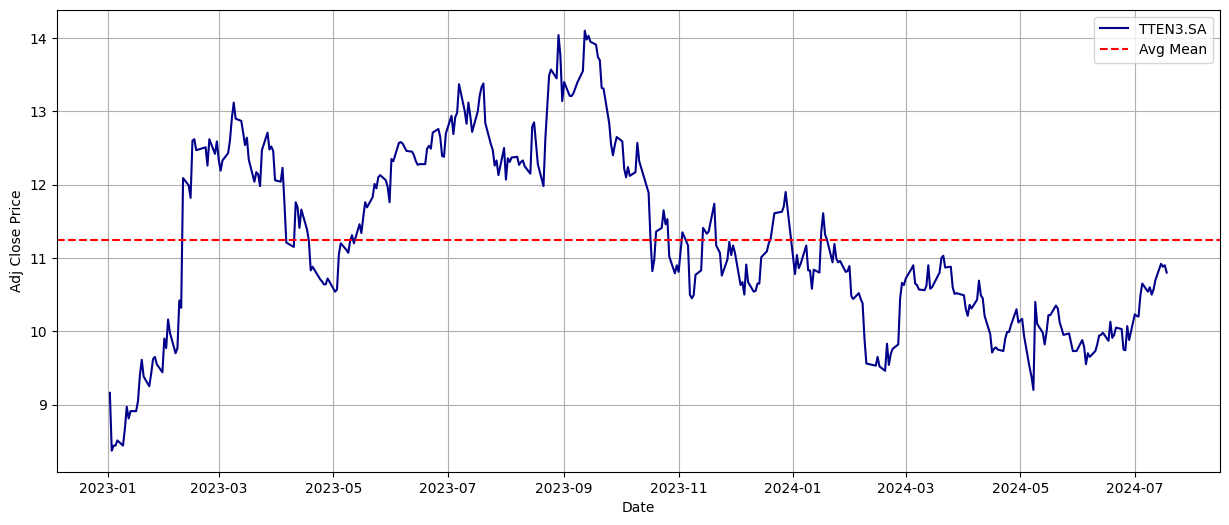

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: NEOE3.SA
Average price: R$ 17.6
Actual Price:  R$ 18.71
------------------------------------------------------
Results:
Ticker: BRBI11.SA
Average price: R$ 12.76
Actual Price:  R$ 14.54
------------------------------------------------------
Results:
Ticker: PNVL3.SA
Average price: R$ 11.12
Actual Price:  R$ 9.89
------------------------------------------------------


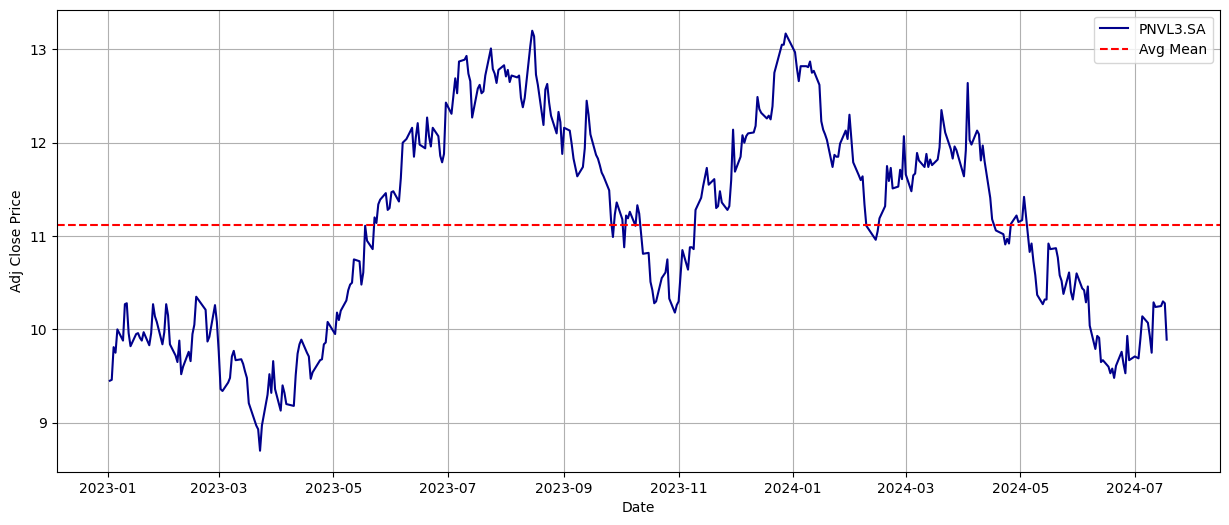

[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: VIVA3.SA
Average price: R$ 25.77
Actual Price:  R$ 22.85
------------------------------------------------------


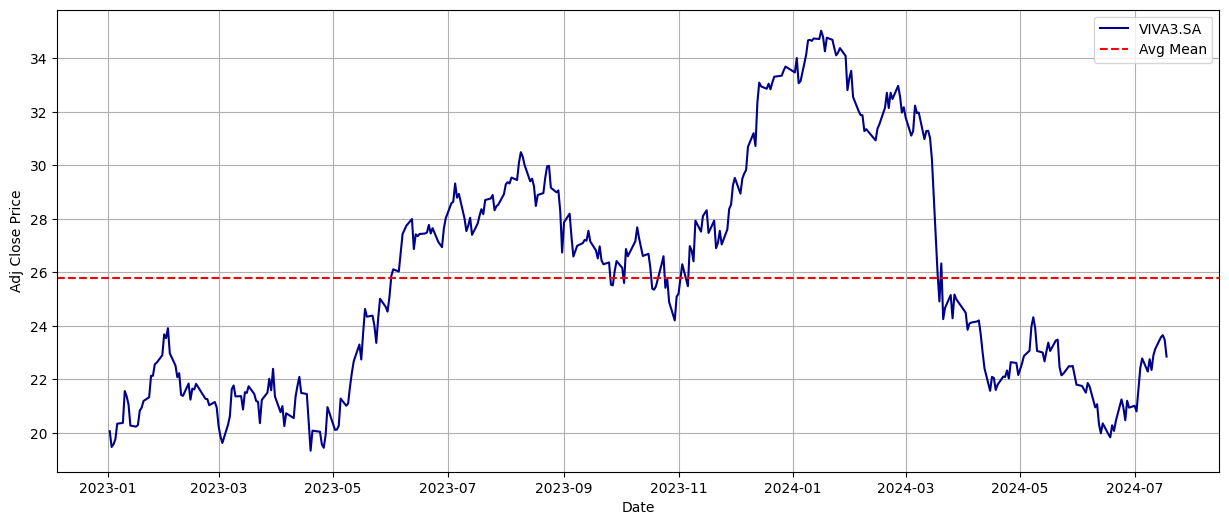

[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: SIMH3.SA
Average price: R$ 7.91
Actual Price:  R$ 6.36
------------------------------------------------------


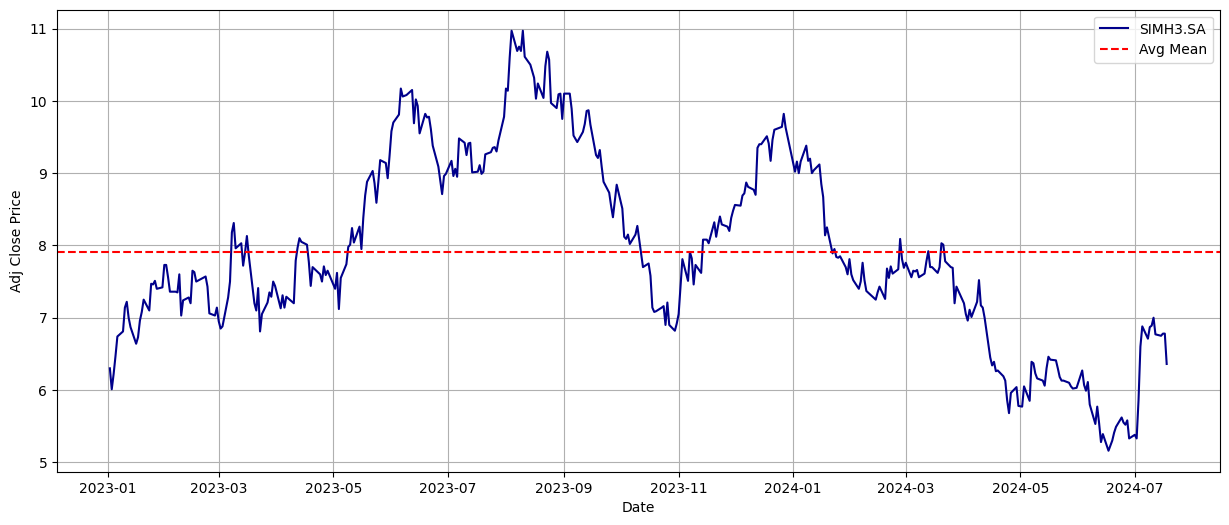

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: TIMS3.SA
Average price: R$ 14.55
Actual Price:  R$ 16.75
------------------------------------------------------
Results:
Ticker: KLBN11.SA
Average price: R$ 19.13
Actual Price:  R$ 21.41
------------------------------------------------------
Results:
Ticker: EZTC3.SA
Average price: R$ 16.1
Actual Price:  R$ 14.3
------------------------------------------------------


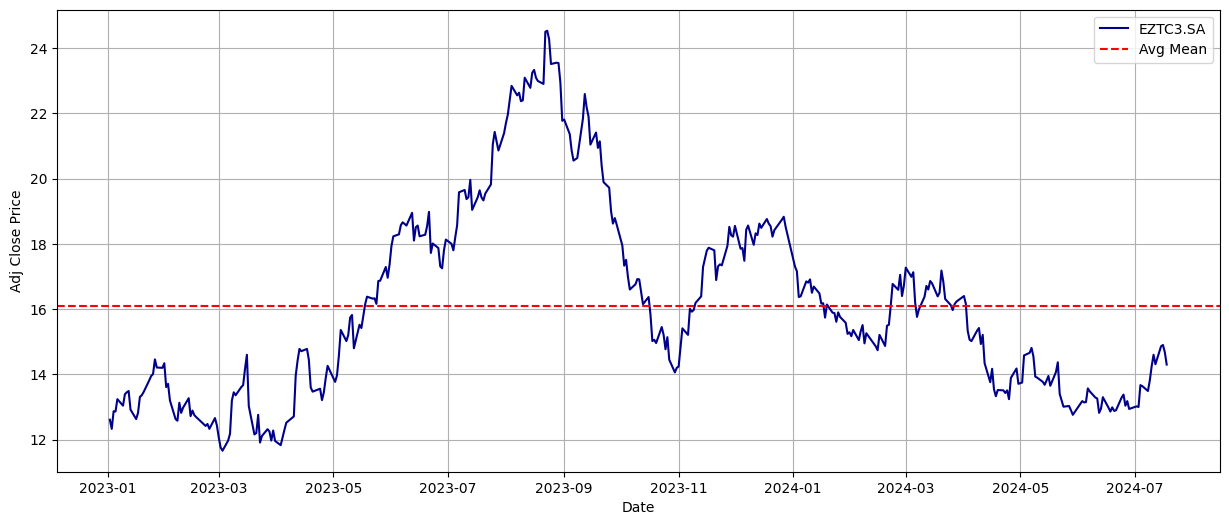

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: GMAT3.SA
Average price: R$ 6.88
Actual Price:  R$ 7.16
------------------------------------------------------
Results:
Ticker: CSAN3.SA
Average price: R$ 15.88
Actual Price:  R$ 13.88
------------------------------------------------------


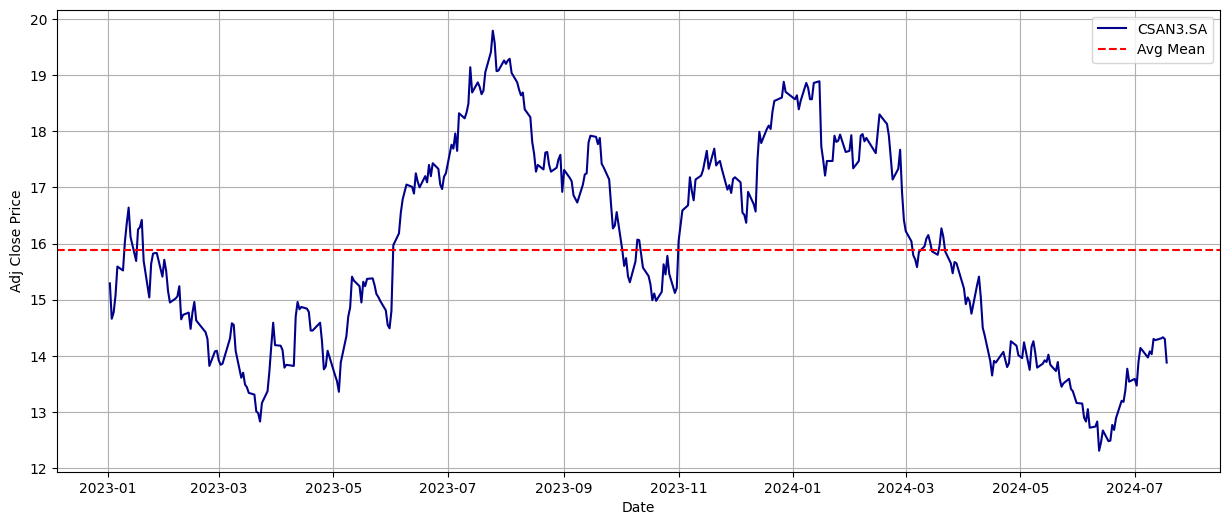

[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: BLAU3.SA
Average price: R$ 16.99
Actual Price:  R$ 11.58
------------------------------------------------------


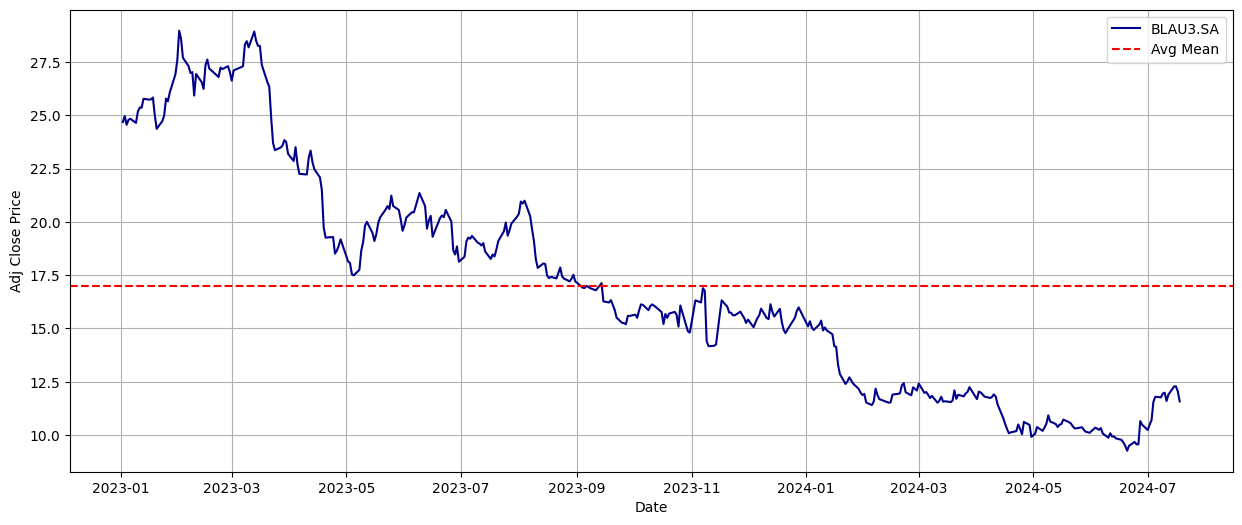

[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: BRKM5.SA
Average price: R$ 21.29
Actual Price:  R$ 18.41
------------------------------------------------------


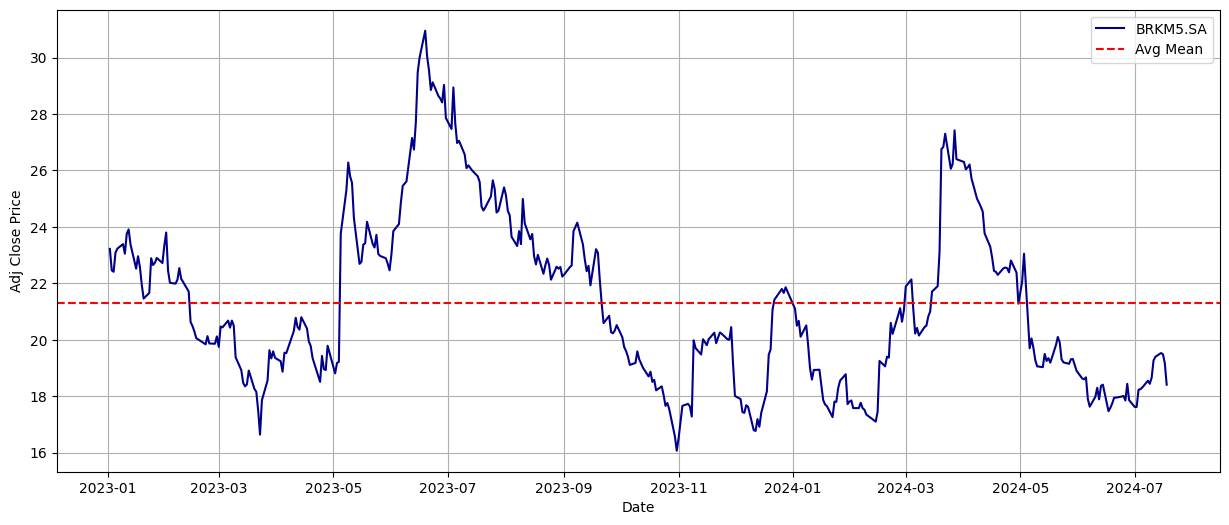

In [96]:
tickers = [
    "VAMO3.SA", "TTEN3.SA", "NEOE3.SA", "BRBI11.SA", 
    "PNVL3.SA", "VIVA3.SA", "SIMH3.SA", "TIMS3.SA", 
    "KLBN11.SA", "EZTC3.SA", "GMAT3.SA", "CSAN3.SA", 
    "BLAU3.SA", "BRKM5.SA"
]


for ticker in tickers: 
    #Parameters: Ticker, Start Date, End Date, Show All Graphs, Show Graphs of stocks below their historical average
    check_historical_mean(ticker, "2023-01-01", datetime.today().strftime('%Y-%m-%d'), False, True)

[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: FIQE3.SA
Average price: R$ 3.52
Actual Price:  R$ 3.36
------------------------------------------------------


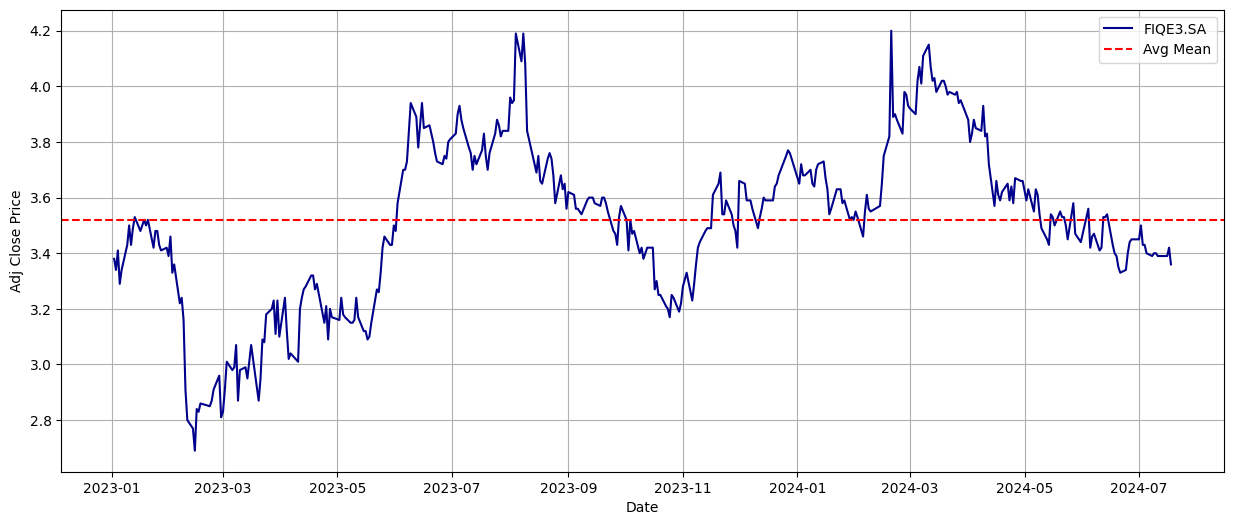

[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: SIMH3.SA
Average price: R$ 7.91
Actual Price:  R$ 6.36
------------------------------------------------------


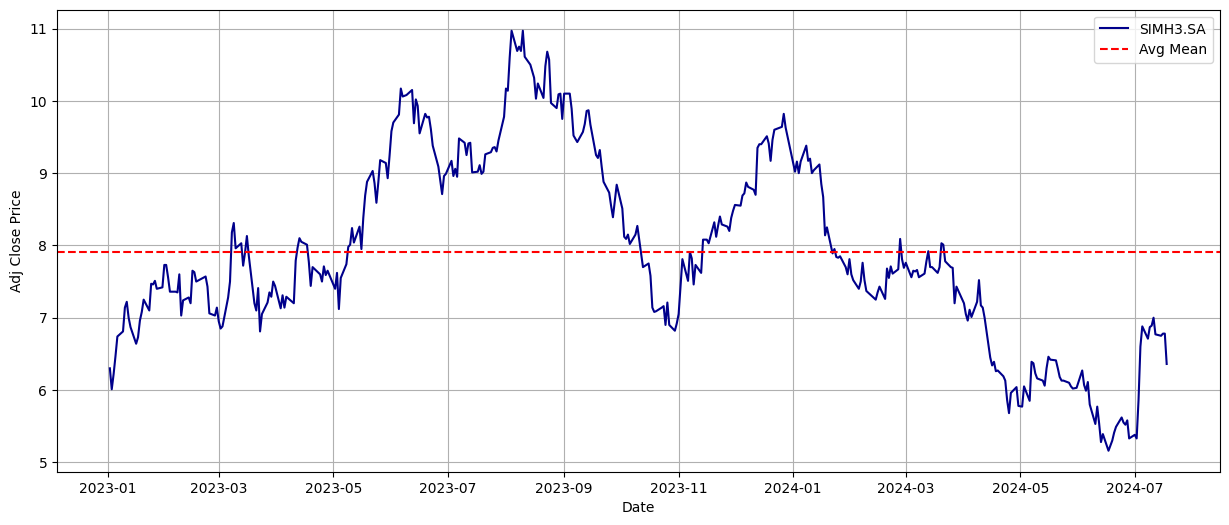

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: SOJA3.SA
Average price: R$ 13.35
Actual Price:  R$ 15.27
------------------------------------------------------
Results:
Ticker: ALOS3.SA
Average price: R$ 22.52
Actual Price:  R$ 21.68
------------------------------------------------------


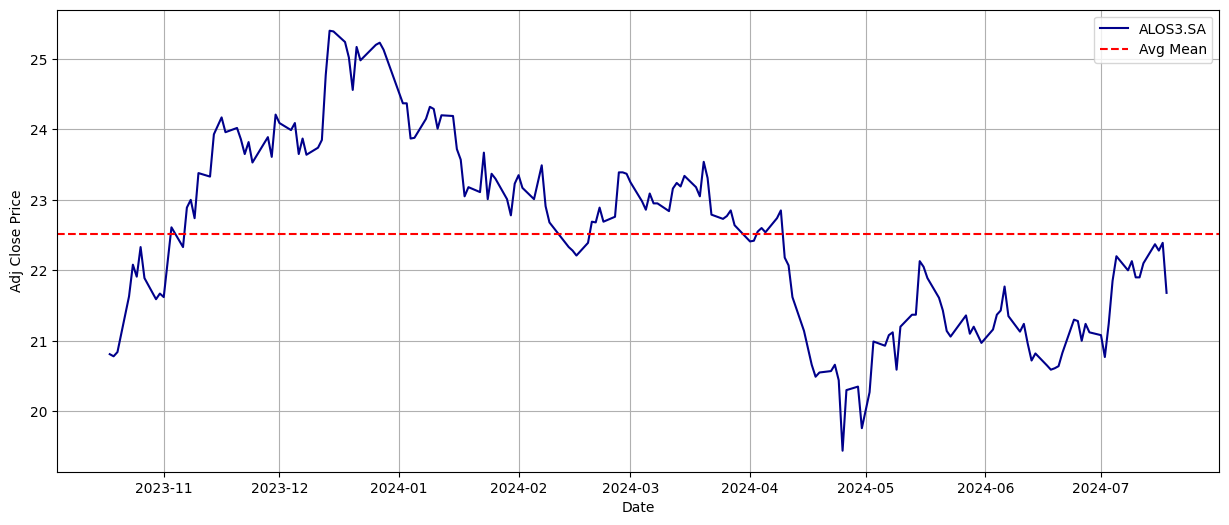

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: RECV3.SA
Average price: R$ 20.27
Actual Price:  R$ 20.84
------------------------------------------------------
Results:
Ticker: ABCB4.SA
Average price: R$ 18.96
Actual Price:  R$ 22.59
------------------------------------------------------
Results:
Ticker: MLAS3.SA
Average price: R$ 2.39
Actual Price:  R$ 2.03
------------------------------------------------------


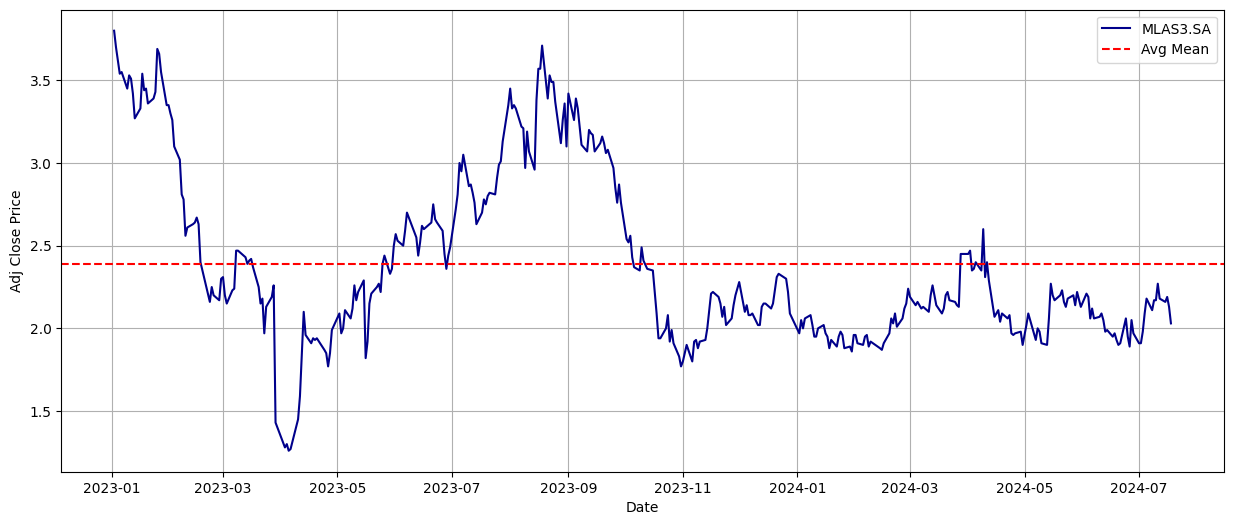

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Results:
Ticker: KEPL3.SA
Average price: R$ 9.38
Actual Price:  R$ 10.17
------------------------------------------------------
Results:
Ticker: FESA4.SA
Average price: R$ 10.8
Actual Price:  R$ 8.83
------------------------------------------------------


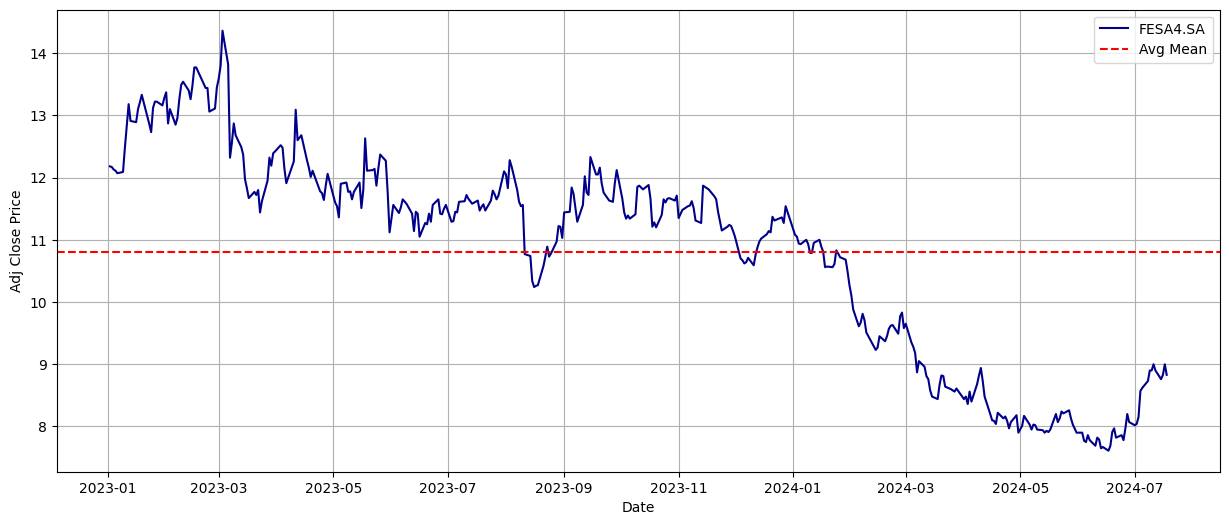

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Results:
Ticker: TRIS3.SA
Average price: R$ 4.58
Actual Price:  R$ 5.03
------------------------------------------------------
Results:
Ticker: SHUL4.SA
Average price: R$ 5.91
Actual Price:  R$ 6.65
------------------------------------------------------
Results:
Ticker: BRSR6.SA
Average price: R$ 11.64
Actual Price:  R$ 11.79
------------------------------------------------------


In [97]:
tickers = [
    "FIQE3.SA", "SIMH3.SA", "SOJA3.SA", "ALOS3.SA", 
    "RECV3.SA", "ABCB4.SA", "MLAS3.SA", "KEPL3.SA", 
    "FESA4.SA", "TRIS3.SA", "SHUL4.SA", "BRSR6.SA" 
    
]

for ticker in tickers: 
    check_historical_mean(ticker, "2023-01-01", datetime.today().strftime('%Y-%m-%d'), False, True)